# Phong Hoang - Starcraft Player Data 

## Introduction

Data analysis has become an essential tool for getting a competitive edge in the world of eSports, where strategy and accuracy are king. A well-known real-time strategy game called StarCraft has seen the blending of gaming and analytics, lifting players and teams to new levels of success. The eSports scene has changed as a result of this data-driven revolution, which provides unmatched insights into the gameplay mechanics, decision-making procedures, and general performance of StarCraft players. With eSports becoming more and more popular, a massive data set comprising a variety of elements, such as player statistics, match results, strategies, and in-game occurrences, has been available. A new breed of experts known as "eSports analysts" have emerged as a result of the increase in data analysis inside the eSports community. These people use their expertise in game theory, machine learning, and statistical analysis to glean valuable insights from the massive amounts of data produced by StarCraft competitions.

The primary objective of this data analysis project is to delve into the world of StarCraft players and harness the power of data to understand the intricacies of their gameplay. By dissecting the vast amount of information available, we aim to uncover patterns, trends, and correlations that can help in evaluating player performance, optimizing strategies, and identifying areas for improvement. By leveraging sophisticated analytical techniques, we will aim to unlock the secrets behind the success of StarCraft players, providing invaluable insights that can guide future training, scouting, and strategic decision-making in the world of eSports.

## Ethical Consideration

When working with this kind of data, we should be mindful of whether the source of these data acknowledge that their information is being disclosed and used for what purpose. We also need to think about whether the data is being taken out of context or not. Therefore, in this analysis, some potential stakeholders are the StarCraft players or the Blizzard Entertainment because their personal information is being used publicly. This analysis may commit a breach of privacy of the individuals whose information is used. As for the source, there might be a chance that some sources are not trustworthy. For example, in a rank match, there are potentially players who troll or don't play at their best, resulting in their team defeat. Therefore, this leads to a potential that our analysis takes data out of context and becomes misleading. As a result, our analysis may not accurately represent what’s actually happening.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import warnings
import scipy.stats
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("starcraft_player_data.csv")

In [3]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


## Exploratory Data Analysis

### An Overview about League Rank 

In [4]:
df.corr()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.102601,0.159691,0.160802,0.136184,0.117366,0.074045,0.046583,0.089635,-0.102572,-0.087222,0.047255,0.032313,-0.011636,0.021204,-0.027098,0.003248
LeagueIndex,0.102601,1.000000,0.662309,0.490599,0.531125,0.351213,0.312544,0.233231,0.612192,-0.553246,-0.673939,0.143121,0.220676,0.295643,0.133508,0.148834,0.145733
APM,0.159691,0.662309,1.000000,0.840693,0.578416,0.361704,0.271021,0.322179,0.651237,-0.575275,-0.722402,0.383985,0.220749,0.349692,0.100844,0.136143,0.131587
SelectByHotkeys,0.160802,0.490599,0.840693,1.000000,0.504526,0.302096,0.197158,0.143368,0.398505,-0.304290,-0.415388,0.163282,0.083481,0.141723,0.006121,0.044002,0.061037
AssignToHotkeys,0.136184,0.531125,0.578416,0.504526,1.000000,0.420242,0.242196,0.193043,0.486729,-0.396891,-0.482191,0.093668,0.192928,0.183065,0.132829,0.144603,0.154410
UniqueHotkeys,0.117366,0.351213,0.361704,0.302096,0.420242,1.000000,0.180592,0.141576,0.372079,-0.242815,-0.323103,-0.016400,0.264650,0.108141,0.225030,0.110363,0.102453
MinimapAttacks,0.074045,0.312544,0.271021,0.197158,0.242196,0.180592,1.000000,0.242269,0.177343,-0.237633,-0.199904,0.134804,0.166392,0.077624,0.120824,0.040239,0.044528
MinimapRightClicks,0.046583,0.233231,0.322179,0.143368,0.193043,0.141576,0.242269,1.000000,0.176137,-0.254466,-0.230660,0.307512,0.172592,0.206594,0.148699,0.091604,0.090650
NumberOfPACs,0.089635,0.612192,0.651237,0.398505,0.486729,0.372079,0.177343,0.176137,1.000000,-0.506261,-0.820334,-0.232018,0.460275,0.277891,0.306295,0.181484,0.168293
GapBetweenPACs,-0.102572,-0.553246,-0.575275,-0.304290,-0.396891,-0.242815,-0.237633,-0.254466,-0.506261,1.000000,0.689402,-0.311072,-0.095330,-0.235419,-0.084855,-0.074659,-0.090566


<AxesSubplot:>

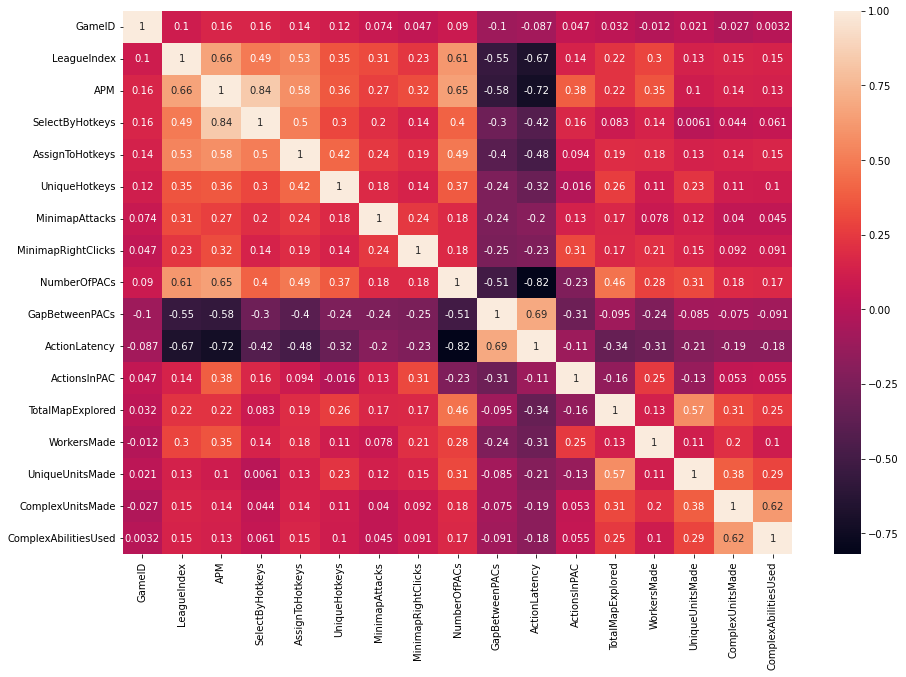

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

While there are many highly correlated variables, we are more interested in variables which might tell a story about the League Index. We can see that `Player's APM`, their `AssignToHotkeys`, their `NumberOfPACs`, their `GapBetweenPACs`, and their `Action Latency` have a high correlation, either positive or negative. This offers us opportunities to take a deeper look into what might affect a player's performance in ranked games. Since we have only `League Index` as a categorical variable and other variables are continous, the only visable way to visualize is to use box plot, density plot and violin plot.

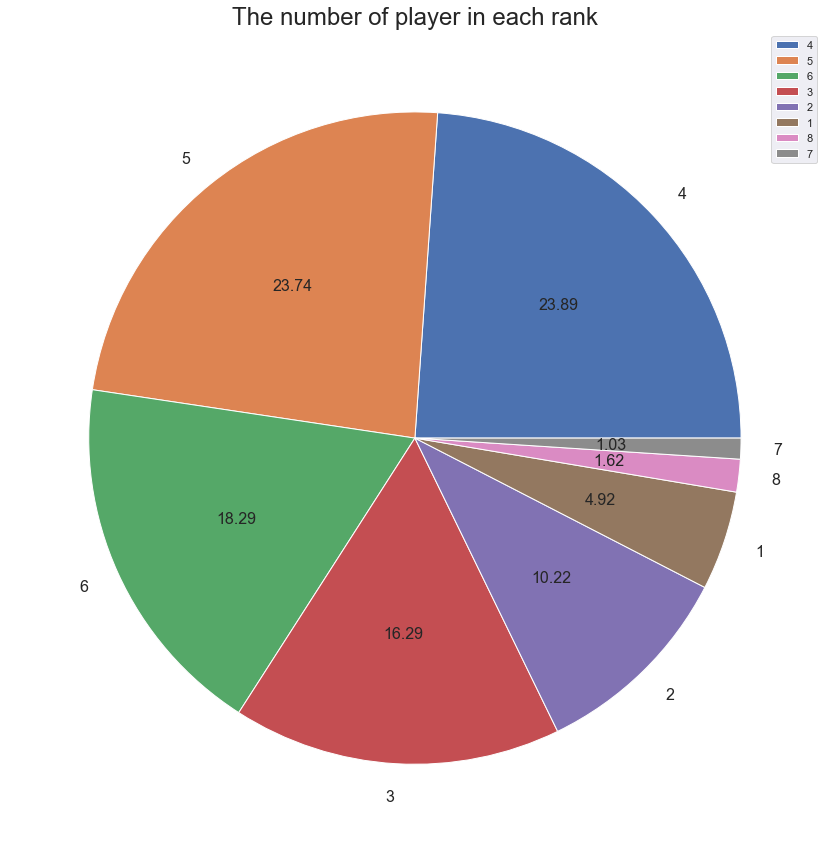

In [6]:
sns.set(rc={'figure.figsize':(15,15)})
a = df['LeagueIndex'].value_counts()
a.plot(kind = 'pie', autopct='%.2f',textprops={'fontsize': 16})
plt.title("The number of player in each rank", fontsize=24)
plt.ylabel('')
plt.legend()
plt.show()

Text(0.5, 1.0, "The distribution of player's rank")

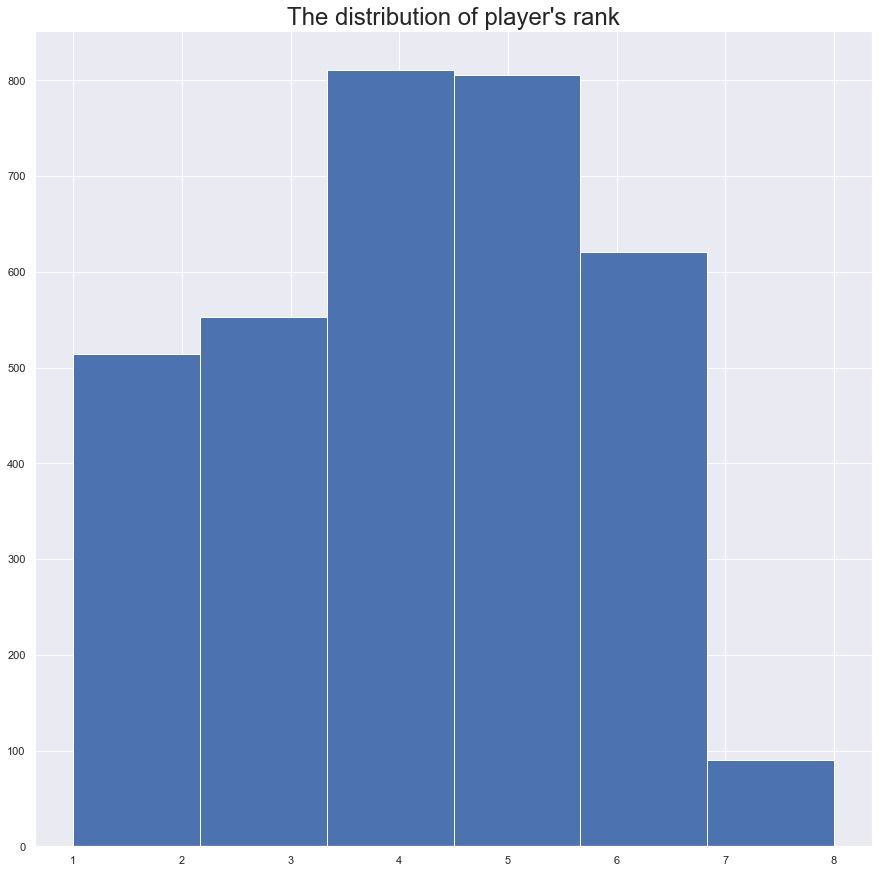

In [7]:
df["LeagueIndex"].hist(bins = 6)
plt.title("The distribution of player's rank", fontsize=24)

From the pie chart and the distribution plot of player's rank, we can see that Platinum and Diamond player account for the most percentage in the database, nearly 50%. On the other hand, Grandmaster and Professional players only have 3% in the player's base, which make sense because it requires skills and experience to achieve these marks.

### Functioning the visualization

In [8]:
def density_plot(variable):
    plt.figure(figsize=(15, 10))
    title = "Density plot for Player's " + variable + " and Their Rank"
    return sns.kdeplot(data=df, x=variable, hue = 'LeagueIndex', common_norm = False). set_title(title, fontdict={'size': 16, 'weight': 'bold'})


In [9]:
def violin_plot(variable):
    plt.figure(figsize=(15, 10))
    title = "Violin plot for Player's " + variable +  " and Their Rank"
    sns.violinplot(x ="LeagueIndex",
             y = variable,
             data = df).set_title("Violin plot for Player's APM and Their Rank", fontdict={'size': 16, 'weight': 'bold'})

### Player's APM with Their Rank

Text(0.5, 1.0, "Density plot for Player's APM and Their Rank")

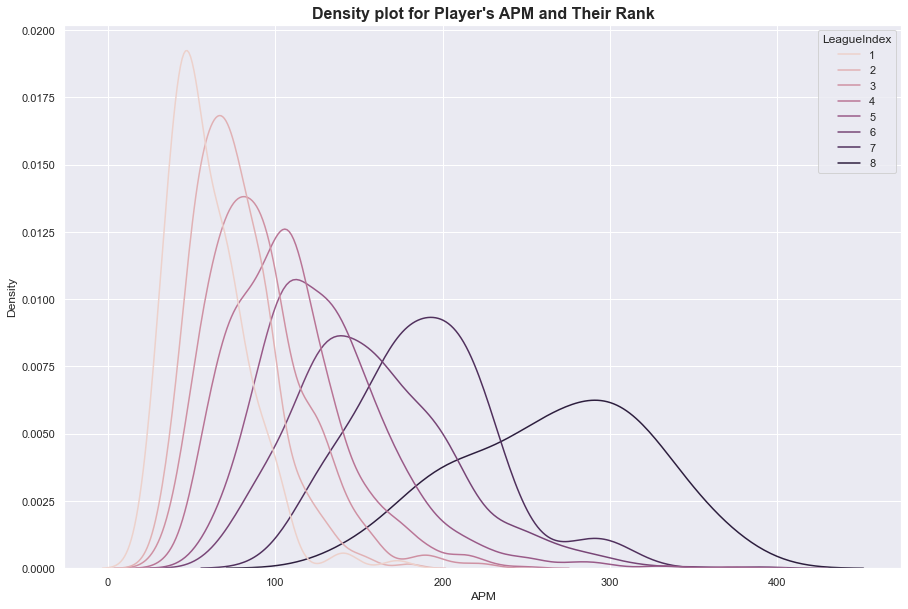

In [10]:
density_plot("APM")

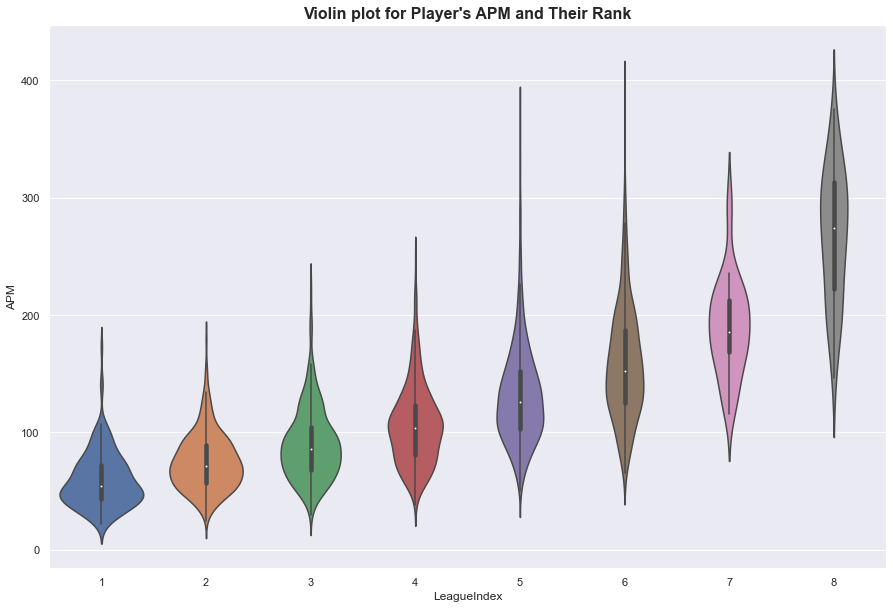

In [11]:
violin_plot("APM")

From both the density plot and the violin plot between the Player's APM and their rank, we can see that there is a huge difference in the APM among player's ranks. The higher a player's rank is, the better he/she will be. In StarCraft, a high APM can be advantageous as it allows players to execute their strategies more efficiently, maintain map control, perform micro-management and react swiftly to in-game events. Skilled players often have a higher APM due to their ability to multitask, make rapid decisions, and carry out precise actions.

### Player's Rank with AssignToHotKeys

Text(0.5, 1.0, "Density plot for Player's AssignToHotkeys and Their Rank")

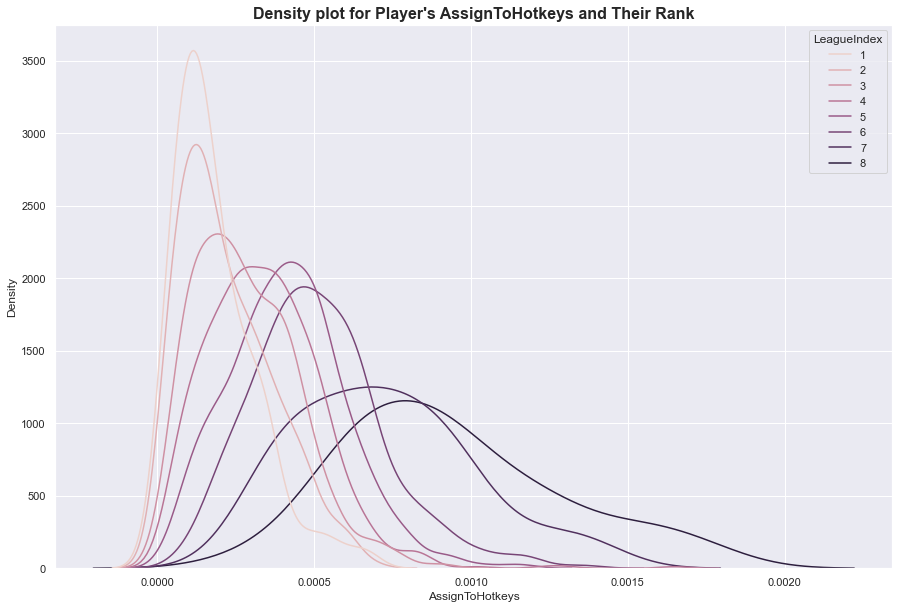

In [12]:
density_plot("AssignToHotkeys")

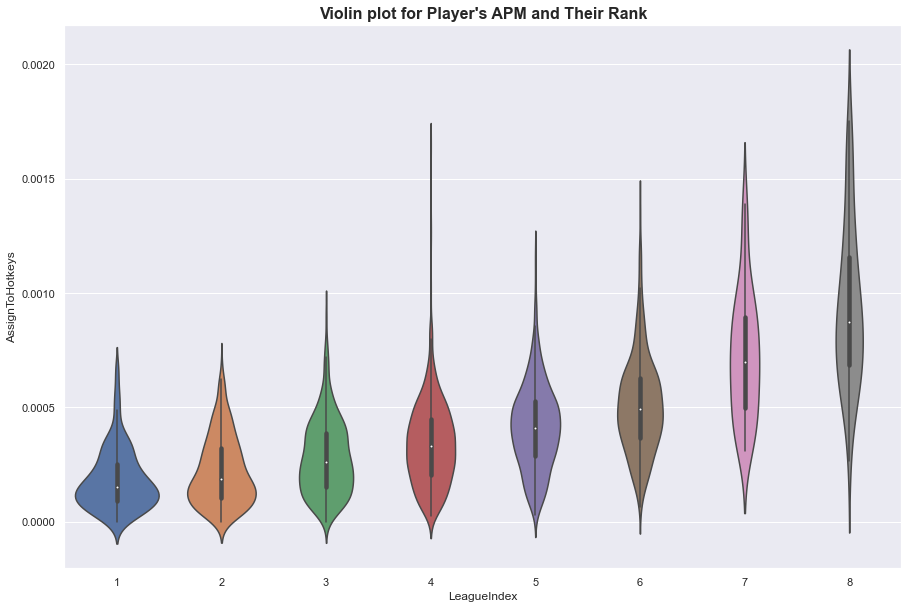

In [13]:
violin_plot("AssignToHotkeys")

The assign to hotkey variable, representing the number of units or buildings assigned to hotkeys per timestamp, exhibits a positive correlation with player rank in StarCraft. This indicates that higher-ranked players tend to utilize hotkeys more effectively, enabling them to streamline decision-making, which eventually gains a competitive advantage. In conclusion, mastering hotkey usage is a crucial aspect of improving gameplay efficiency and advancing in StarCraft.

### Player's NumberofPACs and their rank

Text(0.5, 1.0, "Density plot for Player's NumberOfPACs and Their Rank")

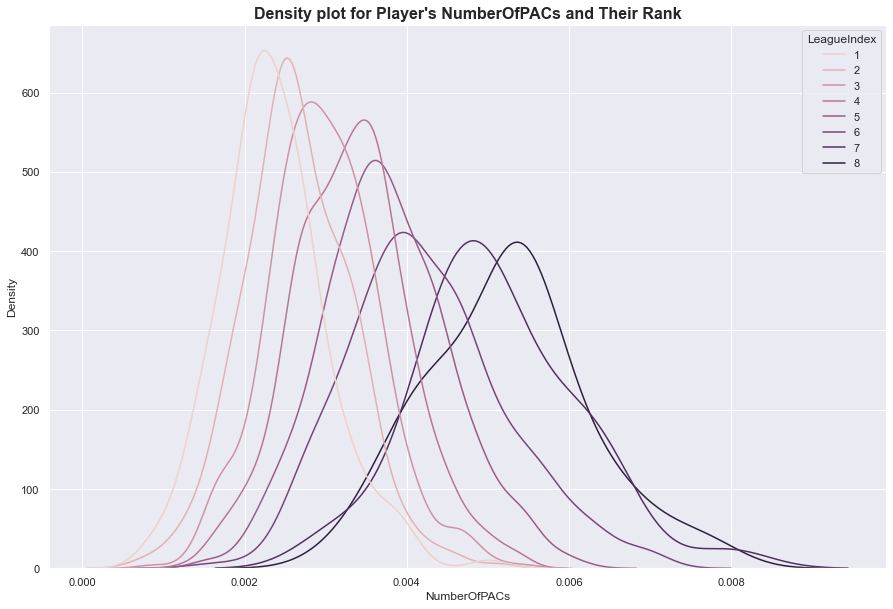

In [14]:
density_plot("NumberOfPACs")

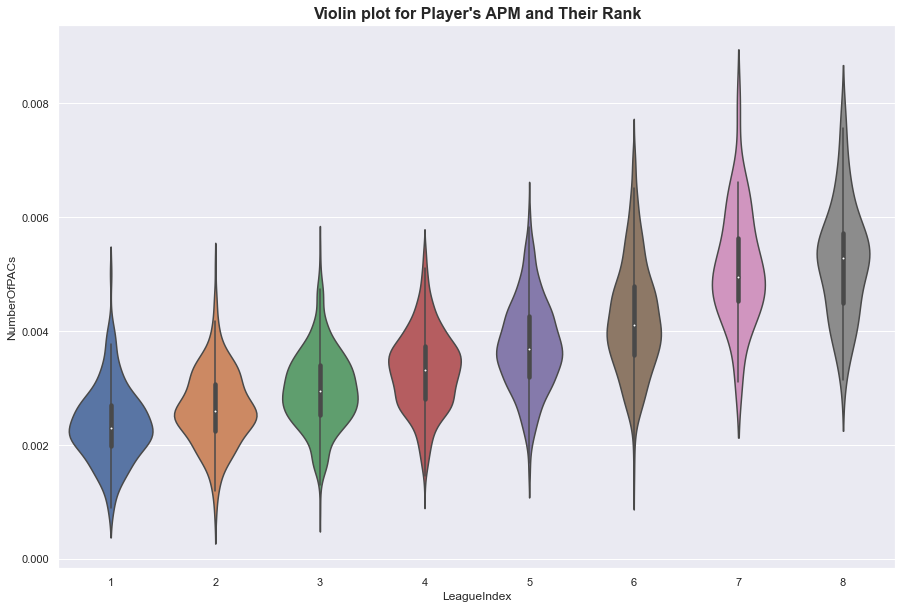

In [15]:
violin_plot("NumberOfPACs")

In StarCraft, there is a direct correlation between the quantity of PACs and player rank. Higher-ranked players experience information perception and action cycles more frequently, demonstrating their effective decision-making and capacity for game adaptation. Their success is a result of quick information processing and quick strategic decisions, which gives them an advantage in StarCraft.

### Player's GapBetweenPACs and their rank

Text(0.5, 1.0, "Density plot for Player's GapBetweenPACs and Their Rank")

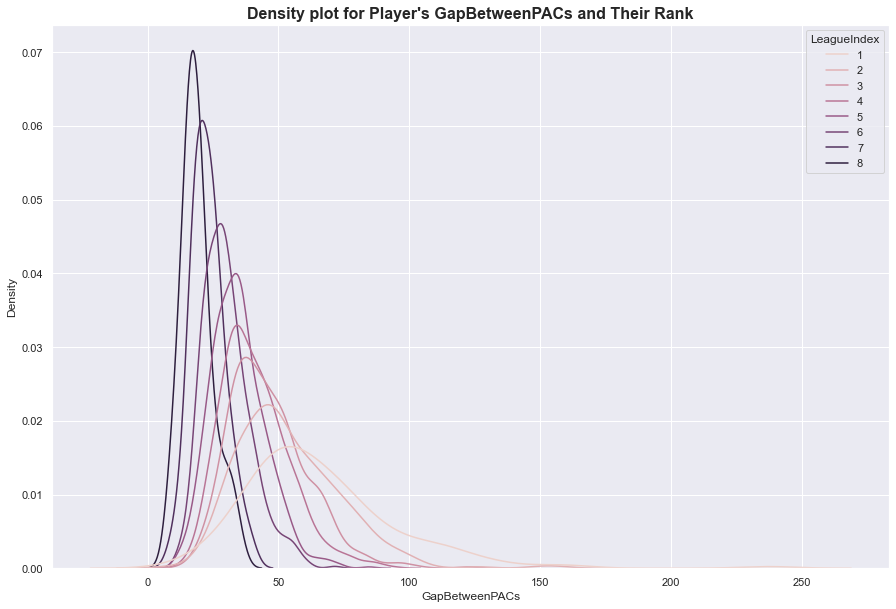

In [16]:
density_plot("GapBetweenPACs")

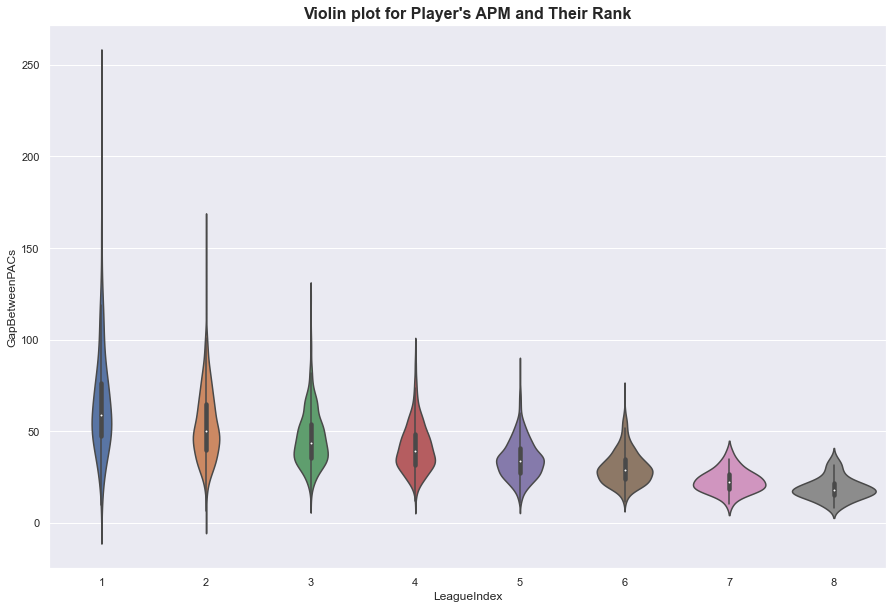

In [17]:
violin_plot("GapBetweenPACs")

There is an inverse relationship between player rank and betweenPACs (mean time between Perception Action Cycles). Players with higher rankings have less gaps between PACs, which shows that they make decisions quickly and are very engaged. Their success is influenced by their ability to assimilate information quickly and act quickly.

### Player's ActionLatency and their rank

Text(0.5, 1.0, "Density plot for Player's ActionLatency and Their Rank")

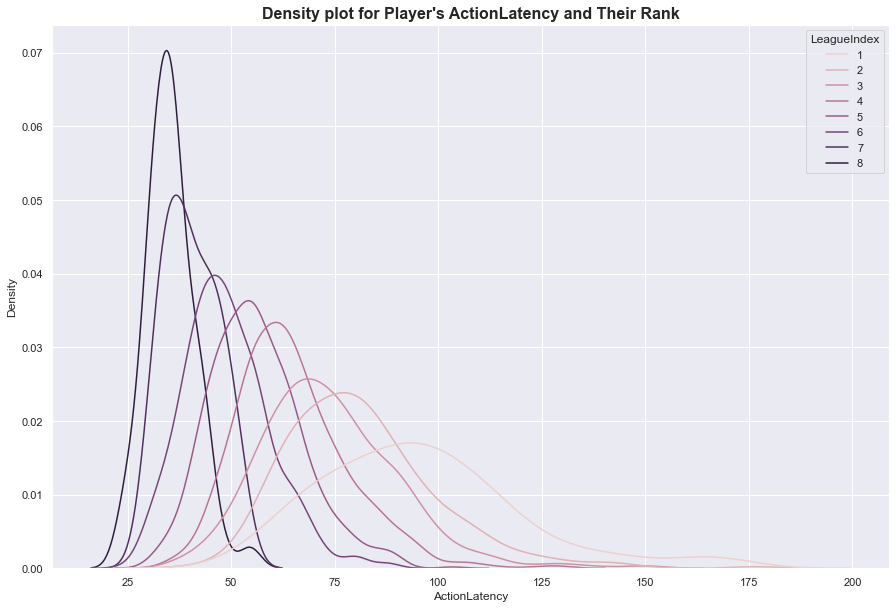

In [18]:
density_plot("ActionLatency")

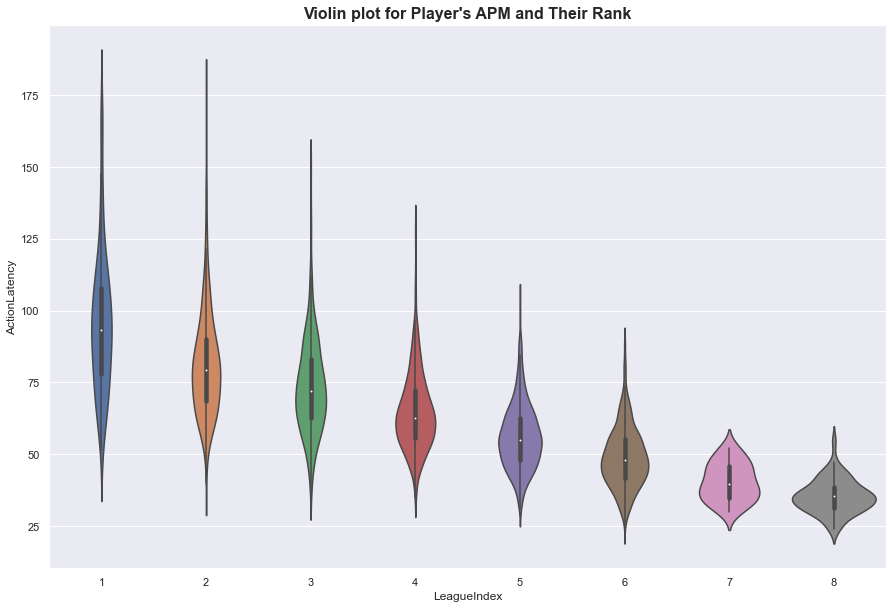

In [19]:
violin_plot("ActionLatency")

In StarCraft, there is a negative association between ActionLatency (mean delay from the start of perception action cycles to the first action) and player rank. Shorter latencies are indicative of quicker information processing and quicker action initiation among higher-ranked athletes. Their success is a result of making decisions quickly and responding appropriately.

## Modelling

## Dealing with Nan values

In [20]:
df.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

There is no NA values in this data set, which is great!

### Dealing with Outliers and Categorical variables


In [21]:
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

There are only `HoursPerWeek` and `TotalHours` which are object, so a simply transform back to the integer type should be fine, although we have to do something with the "?" in the data

In [22]:
df["HoursPerWeek"] = pd.to_numeric(df["HoursPerWeek"], errors='coerce')
df["TotalHours"] = pd.to_numeric(df["TotalHours"], errors = 'coerce')

In [23]:
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,NaN,NaN,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,NaN,NaN,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [24]:
df.isna().sum()

GameID                   0
LeagueIndex              0
Age                      0
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

### Splitting the dataset into the Training set, Test set, and Validation set

In [27]:
X = df.iloc[:, df.columns != 'LeagueIndex' ].values
y = df.iloc[:, df.columns == 'LeagueIndex'].values

In [28]:
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,9261,4,20,8.0,400.0,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56.0,1500.0,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8.0,100.0,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,20,28.0,400.0,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

### Logistics Regression

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
LogisticRegressionclassifier = LogisticRegression(random_state = 0)
LogisticRegressionclassifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
LogisticRegressiony_pred = LogisticRegressionclassifier.predict(X_test)
LogisticRegressioncm = confusion_matrix(y_test, LogisticRegressiony_pred)
print(LogisticRegressioncm)
accuracy_score(y_test, LogisticRegressiony_pred)

[[11 11  4  5  1  0  0]
 [12 13 18 21  2  0  0]
 [ 2 12 26 49  6  4  0]
 [ 0 11 14 60 50 12  0]
 [ 0  2  7 43 66 28  1]
 [ 0  0  2 12 33 57  0]
 [ 0  0  0  0  0  5  1]]


0.389351081530782

In [33]:
LogisticRegressionf1_score = f1_score(y_test, LogisticRegressiony_pred,average="macro")
print(LogisticRegressionf1_score)

0.3570944765571535


### Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DecisionTreeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
DecisionTreey_pred = DecisionTreeclassifier.predict(X_test)
DecisionTreecm = confusion_matrix(y_test, DecisionTreey_pred)
print(DecisionTreecm)
accuracy_score(y_test, DecisionTreey_pred)

[[11  8  8  3  2  0  0]
 [14 15 18 14  5  0  0]
 [ 3 11 26 37 17  5  0]
 [ 2 13 30 40 43 19  0]
 [ 2  7 14 42 55 27  0]
 [ 1  0  3 15 38 45  2]
 [ 0  0  0  0  1  4  1]]


0.3211314475873544

In [36]:
from sklearn.metrics import f1_score
DecisionTreef1score = f1_score(y_test, DecisionTreey_pred,average="macro")
print(DecisionTreef1score)

0.30572653241143455


## Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier
RandomForestclassifier = RandomForestClassifier(n_estimators = 10, max_features = 20, bootstrap =  False)
RandomForestclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=20, n_estimators=10)

In [38]:
RandomForesty_pred = RandomForestclassifier.predict(X_test)
RandomForestcm = confusion_matrix(y_test, RandomForesty_pred)
print(RandomForestcm)
accuracy_score(y_test, RandomForesty_pred)

[[ 7  8  9  8  0  0  0]
 [15 18 16 13  4  0  0]
 [ 5 16 26 35 12  5  0]
 [ 6 16 24 42 43 16  0]
 [ 0  5 18 43 44 35  2]
 [ 0  2  7 17 30 42  6]
 [ 0  0  0  0  2  4  0]]


0.2978369384359401

In [39]:
RandomForestf1_score = f1_score(y_test, RandomForesty_pred,average="macro")
print(RandomForestf1_score)

0.24953341032839485


### Tuning with Grid Search CV


In [40]:
from sklearn.model_selection import GridSearchCV
parameters = [
 {'n_estimators': [3,5, 10,20], 'max_features': [2, 4, 6, 8,10]},
 {'bootstrap': [False, True]}]
grid_search = GridSearchCV(estimator = RandomForestclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 39.41 %
Best Parameters: {'bootstrap': True}


## XgBoost

In [41]:
X_train_xgb = X_train
y_train_xgb = y_train
X_test_xgb = X_test
y_test_xgb = y_test

In [42]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_xgb = le.fit_transform(y_train_xgb)
y_test_xgb = le.fit_transform(y_test_xgb)

In [43]:
model.fit(X_train_xgb,y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [44]:
y_pred = model.predict(X_test_xgb)
accuracy = accuracy_score(y_test_xgb, y_pred)
XgBoostcm = confusion_matrix(y_test_xgb, y_pred)
XgBoostcm, accuracy

(array([[10,  9, 10,  3,  0,  0,  0],
        [ 7, 10, 25, 23,  1,  0,  0],
        [ 4, 11, 26, 42, 13,  3,  0],
        [ 0,  9, 27, 57, 43, 11,  0],
        [ 0,  3, 11, 48, 62, 23,  0],
        [ 0,  0,  2, 11, 39, 51,  1],
        [ 0,  0,  0,  0,  1,  5,  0]]),
 0.3594009983361065)

In [45]:
PARAMETERS = {"subsample":[0.5, 0.75, 1],
"colsample_bytree":[0.5, 1],
"max_depth":[2, 6, 12],
"min_child_weight":[1,5,15],
"learning_rate":[0.3, 0.1],
"n_estimators":[100]}

In [46]:
eval_set = [(X_train_xgb,y_train_xgb),(X_test_xgb,y_test_xgb)]

In [47]:
model = xgb.XGBClassifier(n_jobs=-1)
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
#Fit the model as done previously
model_gs.fit(X_train_xgb,y_train_xgb,early_stopping_rounds=10, eval_metric="auc",eval_set=eval_set,verbose=0)
print(model_gs.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 15, 'n_estimators': 100, 'subsample': 0.75}


In [48]:
model = XGBClassifier(colsample_bytree =  0.5, learning_rate = 0.1, max_depth = 6,
                      min_child_weight=  15, n_estimators = 100, subsample= 0.75)
model.fit(X_train_xgb,y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=15,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [49]:
y_pred = model.predict(X_test_xgb)
accuracy = accuracy_score(y_test_xgb, y_pred)
XgBoostcm = confusion_matrix(y_test_xgb, y_pred)
XgBoostcm, accuracy

(array([[11, 11,  8,  1,  1,  0,  0],
        [ 8, 15, 23, 17,  3,  0,  0],
        [ 3,  9, 30, 44,  8,  5,  0],
        [ 3,  4, 24, 54, 51, 11,  0],
        [ 0,  2,  9, 45, 61, 30,  0],
        [ 0,  0,  1, 15, 33, 54,  1],
        [ 0,  0,  0,  0,  0,  6,  0]]),
 0.37437603993344426)

[0.03616999 0.0409426  0.04159689 0.07008967 0.10528482 0.06676506
 0.04849348 0.04360045 0.0489402  0.03660841 0.0656709  0.05022557
 0.11011845 0.04219336 0.03765887 0.04165407 0.03739044 0.04007708
 0.03651964]


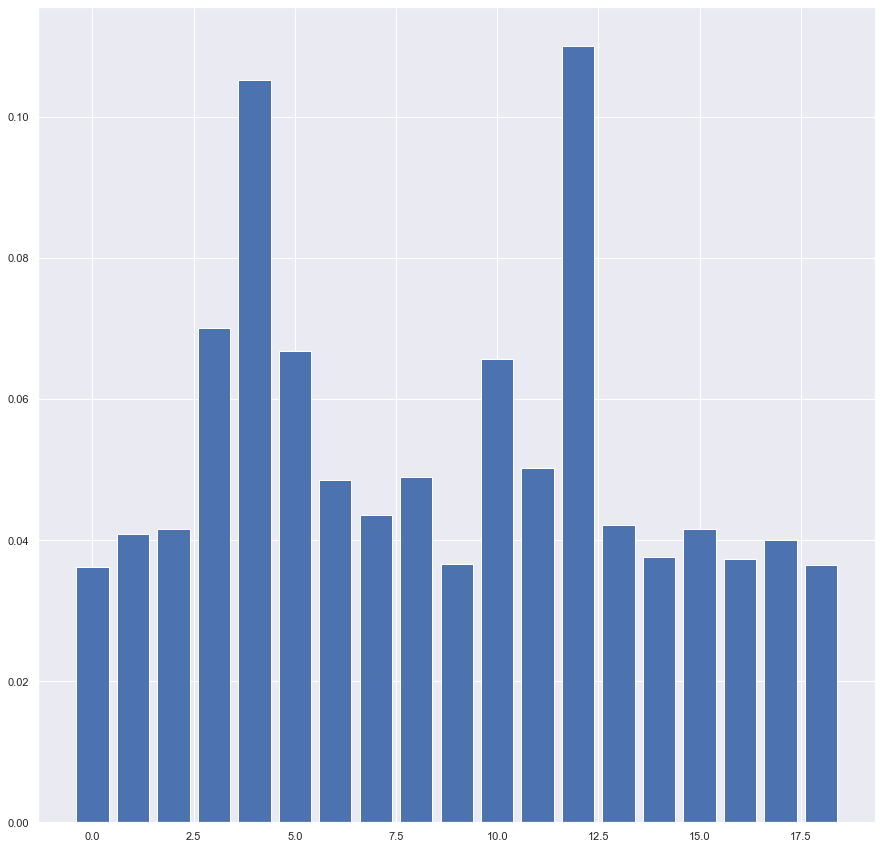

In [50]:
print(model.feature_importances_)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# Recommendation

Both the EDA and the Modeling process highlights the importance of player's APM, hotkeys and PAC related variables to player's rank. Here are some of my recommendation relate to it:

1. To gain a deeper understanding of player performance, we recommend to collect additional data on PAC-related metrics, including the number of PACs, the mean time between PACs (GapBetweenPACs), and the mean latency from PAC onset to the first action (ActionLatency). This expanded dataset will provide valuable insights into players' decision-making processes and responsiveness. It is also important to explore the relationship between these metrics and player rank. By collecting more data points and analyzing their correlation with player rank, we can validate and strengthen the observed connections, leading to more reliable insights into their significance for player performance.

2. It's crucial to compile player-specific information about the efficiency of assigning units or buildings to hotkeys per timestamp. This information will provide insightful information about players' productivity, ability to multitask, and success in carrying out strategies. Additionally, extending the data collecting period will make it possible to record changes in rank and player performance over time, allowing for the examination of trends and patterns as well as potential areas for player performance improvement as they advance. We can gain important insights into the variables affecting player success in StarCraft by taking into account the data specific to each player and tracking volatility over time.

3. For the modelling part, we can try oversampling/undersampling/SMOTE technique of our target is not balanced. In order to prevent biasing our model, we can use stratified sampling to divide our data into validation and test sets. It is always a good idea to design a fairly generalized model when the data is small.




